The data used for EDA is the auto mpg dataset taken from UCI repository.

In [1]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
!dir

 Volume in drive C is OS
 Volume Serial Number is 981B-9BFE

 Directory of C:\Users\divya\PG_AI_ML\Kaggle\car-mpg

28-03-2020  15:08    <DIR>          .
28-03-2020  15:08    <DIR>          ..
27-03-2020  19:30    <DIR>          .ipynb_checkpoints
27-03-2020  19:26            32,149 auto-mpg.data-original
28-03-2020  15:08           166,098 car-mpg.ipynb
28-03-2020  06:23            23,323 car_mpg_cleaned.csv
               3 File(s)        221,570 bytes
               3 Dir(s)  296,003,624,960 bytes free


### Dataset

In [3]:
car_df = pd.read_csv("auto-mpg.data-original", sep='\s+', names= ['mpg','cylinders','displacement','horsepower'
                                                      , 'weight','acceleration','model_year','origin'
                                                      , 'name'] )
car_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


In [4]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       406 non-null float64
displacement    406 non-null float64
horsepower      400 non-null float64
weight          406 non-null float64
acceleration    406 non-null float64
model_year      406 non-null float64
origin          406 non-null float64
name            406 non-null object
dtypes: float64(8), object(1)
memory usage: 28.7+ KB


We see that there are some missing values in mpg, we will seperate those records and use it for validating

In [5]:
car_df.shape

(406, 9)

In [6]:
car_df_test = car_df[car_df['mpg'].isna()]
car_df_test.reset_index(drop=True, inplace=True)

car_df_train = car_df[~car_df['mpg'].isna()]

In [7]:
car_df_test.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,NaN,4.0,133.0,115.0,3090.0,17.5,70.0,2.0,citroen ds-21 pallas
1,NaN,8.0,350.0,165.0,4142.0,11.5,70.0,1.0,chevrolet chevelle concours (sw)
2,NaN,8.0,351.0,153.0,4034.0,11.0,70.0,1.0,ford torino (sw)
3,NaN,8.0,383.0,175.0,4166.0,10.5,70.0,1.0,plymouth satellite (sw)
4,NaN,8.0,360.0,175.0,3850.0,11.0,70.0,1.0,amc rebel sst (sw)


In [8]:
car_df_test.shape,car_df_train.shape

((8, 9), (398, 9))

### Null Values

In [9]:
car_df_train.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [10]:
# check for `nans` in each column
car_df_train.isna().sum()/len(car_df_train)*100

mpg             0.000000
cylinders       0.000000
displacement    0.000000
horsepower      1.507538
weight          0.000000
acceleration    0.000000
model_year      0.000000
origin          0.000000
name            0.000000
dtype: float64

In [11]:
car_df_train[car_df_train['horsepower'].isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
38,25.0,4.0,98.0,NaN,2046.0,19.0,71.0,1.0,ford pinto
133,21.0,6.0,200.0,NaN,2875.0,17.0,74.0,1.0,ford maverick
337,40.9,4.0,85.0,NaN,1835.0,17.3,80.0,2.0,renault lecar deluxe
343,23.6,4.0,140.0,NaN,2905.0,14.3,80.0,1.0,ford mustang cobra
361,34.5,4.0,100.0,NaN,2320.0,15.8,81.0,2.0,renault 18i
382,23.0,4.0,151.0,NaN,3035.0,20.5,82.0,1.0,amc concord dl


Horsepower consists of total of 6 nan rows comprising of around 1.5% of data. As this fraction is very low so it's safe to drop these nan rows for now.

In [12]:
car_df_train = car_df_train[~car_df_train.isnull().any(axis=1)]
car_df_train.reset_index(drop=True,inplace=True)
car_df_train.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


In [13]:
car_df_train.shape

(392, 9)

In [14]:
car_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null float64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null float64
acceleration    392 non-null float64
model_year      392 non-null float64
origin          392 non-null float64
name            392 non-null object
dtypes: float64(8), object(1)
memory usage: 27.7+ KB


### Split Categorical and numerical columns for further analysis

In [15]:
cat_columns = list(car_df_train.select_dtypes(include=['object']).columns)
num_columns = list(car_df_train.select_dtypes(exclude=['object']).columns)

In [16]:
print(f'categorical variables: {cat_columns}')
print(f'numerical variables: {num_columns}')

categorical variables: ['name']
numerical variables: ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin']


In [17]:
## Unique values in columns
car_df_train.nunique()

mpg             127
cylinders         5
displacement     81
horsepower       93
weight          346
acceleration     95
model_year       13
origin            3
name            301
dtype: int64

In [18]:
#Lets convert origin, cylinders and model_year to categorical.
cat_columns.extend(['cylinders','model_year','origin'])
num_columns.remove('cylinders')
num_columns.remove('model_year')
num_columns.remove('origin')


In [19]:
print(f'categorical variables: {cat_columns}')
print(f'numerical variables: {num_columns}')

categorical variables: ['name', 'cylinders', 'model_year', 'origin']
numerical variables: ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']


### Check for duplicate values and drop if any

In [20]:
# find total duplicate entries and drop them if any
print(f'total duplicate rows: {car_df_train.duplicated().sum()}')

car_df_train = car_df_train[~car_df_train.duplicated()]
car_df_train.shape

total duplicate rows: 0


(392, 9)

In [21]:
##Save cleaned dataset for further analysis
car_df_train.to_csv('car_mpg_cleaned.csv',index=False)

### Analysis on Categorical Attributes

In [22]:
# let's import the cleaned version of mpg although no need here because we already updated df
df = pd.read_csv("car_mpg_cleaned.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


In [23]:
df_cat = df[['name','origin','model_year','cylinders']].copy()
df_cat.head()

,name,origin,model_year,cylinders
0,chevrolet chevelle malibu,1.0,70.0,8.0
1,buick skylark 320,1.0,70.0,8.0
2,plymouth satellite,1.0,70.0,8.0
3,amc rebel sst,1.0,70.0,8.0
4,ford torino,1.0,70.0,8.0


Good blog on SettingWithCopyWarning : https://www.dataquest.io/blog/settingwithcopywarning/

In [24]:
## Remove extra spaces in string columns
for col in ['name']:
    df_cat[col] = df_cat[col].apply(lambda x : ' '.join(x.split()))

In [25]:
df_cat['mpg_level'] = df['mpg'].apply(lambda x: 'low' if x<17 else 'high' if x>29 else 'medium')
cat_columns.append('mpg_level')
print(f'categorical variables:  {cat_columns}')

categorical variables:  ['name', 'cylinders', 'model_year', 'origin', 'mpg_level']


In [26]:
print(f"categories in origin: {pd.unique(df_cat['origin'])}")
print(f"categories in cylinders: {pd.unique(df_cat['cylinders'])}")
print(f"categories in model_year: {pd.unique(df_cat['model_year'])}")

categories in origin: [1. 3. 2.]
categories in cylinders: [8. 4. 6. 3. 5.]
categories in model_year: [70. 71. 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82.]


In [27]:
df_cat.describe()

,origin,model_year,cylinders
count,392.000000,392.000000,392.000000
mean,1.576531,75.979592,5.471939
std,0.805518,3.683737,1.705783
min,1.000000,70.000000,3.000000
25%,1.000000,73.000000,4.000000
50%,1.000000,76.000000,4.000000
75%,2.000000,79.000000,8.000000
max,3.000000,82.000000,8.000000


In [ ]:
!dir

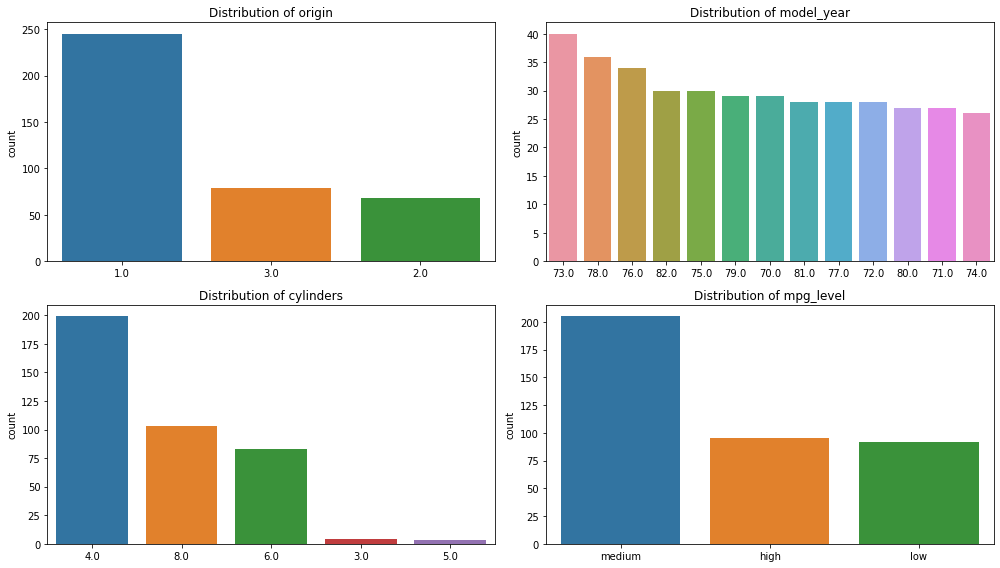

In [28]:
fig = plt.figure(1, (14, 8))

for i,cat in enumerate(df_cat.drop(['name'], axis=1).columns):
    ax = plt.subplot(2,2,i+1)
    sns.countplot(df_cat[cat], order=df_cat[cat].value_counts().index)
    ax.set_xlabel(None)
    ax.set_title(f'Distribution of {cat}')
    plt.tight_layout()

plt.show()

In [29]:
# calculate proportion of dominant classes in each category
num_rows, num_cols = df.shape
for i,cat in enumerate(df_cat.drop(['name'], axis=1).columns):
    val_counts = df_cat[cat].value_counts()
    dominant_frac = val_counts.iloc[0] / num_rows
    print(f'`{val_counts.index[0]}` alone contributes to {round(dominant_frac * 100, 2)}% of {cat}')

`1.0` alone contributes to 62.5% of origin
`73.0` alone contributes to 10.2% of model_year
`4.0` alone contributes to 50.77% of cylinders
`medium` alone contributes to 52.3% of mpg_level


In [30]:
# count of different cylinders
df_cat.cylinders.value_counts()

4.0    199
8.0    103
6.0     83
3.0      4
5.0      3
Name: cylinders, dtype: int64

### Insights
- origin is highly imbalanced, 1 alone consists of 62.5% of data whereas 2 & 3 are having similar proportion. We will see this dominance in future analysis. We will try to find the reason for this in our further analysis.
- cylinders is highly imbalanced, 4 alone consists of 50.77% of data. Whereas 8 & 6 are nearly in same proportion but 3 & 5 collectively accounts for only 7 entries i.e., 1.8% of entire data. We will see this huge proportional imbalance in cylinders in future analysis.
- mpg_level is highly imbalanced, medium alone consists of 52.3% of data while low & high are in the same proportion. This dominance is due the fact of our thresholding while manufacturing this feature because the medium range is broader hence it consists of more data points. It won't be there in original mpg feature as it is continous.
- model_year is considerably balanced which is good.

We will create a new attribute named as car_company by extracting the first word from all names. We also remove the car company from each car name because it is not needed now, and also we rename column name to car_name.

In [31]:
df_cat.name.unique()

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl', 'dodge challenger se',
       "plymouth 'cuda 340", 'chevrolet monte carlo',
       'buick estate wagon (sw)', 'toyota corona mark ii',
       'plymouth duster', 'amc hornet', 'ford maverick', 'datsun pl510',
       'volkswagen 1131 deluxe sedan', 'peugeot 504', 'audi 100 ls',
       'saab 99e', 'bmw 2002', 'amc gremlin', 'ford f250', 'chevy c20',
       'dodge d200', 'hi 1200d', 'chevrolet vega 2300', 'toyota corona',
       'plymouth satellite custom', 'ford torino 500', 'amc matador',
       'pontiac catalina brougham', 'dodge monaco (sw)',
       'ford country squire (sw)', 'pontiac safari (sw)',
       'amc hornet sportabout (sw)', 'chevrolet vega (sw)',
       'pontiac firebird', 'ford mustang', 'mercury capri 2000',
       'opel 1900', 'peugeot 304

In [32]:
# extract car company from `name`
df_cat['car_company'] = df_cat['name'].apply(lambda x: x.split()[0])

# remove car company from `name` and rename to `car_name`
df_cat['car_name'] = df_cat['name'].apply(lambda x: ' '.join(x.split()[1:]))
df_cat.drop('name', axis=1, inplace=True)

cat_columns.extend(['car_company', 'car_name'])
cat_columns.remove('name')

print(f'categorical variables:  {cat_columns}')
df_cat.head()

categorical variables:  ['cylinders', 'model_year', 'origin', 'mpg_level', 'car_company', 'car_name']


,origin,model_year,cylinders,mpg_level,car_company,car_name
0,1.0,70.0,8.0,medium,chevrolet,chevelle malibu
1,1.0,70.0,8.0,low,buick,skylark 320
2,1.0,70.0,8.0,medium,plymouth,satellite
3,1.0,70.0,8.0,low,amc,rebel sst
4,1.0,70.0,8.0,medium,ford,torino


In [33]:
# check for total unique values in `car_company`
print(f'total unique categories in `car_company`: {df_cat.car_company.nunique()}')
print(f"\nunique categories in `car_company`:\n\n {df_cat.car_company.unique()}")

total unique categories in `car_company`: 37

unique categories in `car_company`:

 ['chevrolet' 'buick' 'plymouth' 'amc' 'ford' 'pontiac' 'dodge' 'toyota'
 'datsun' 'volkswagen' 'peugeot' 'audi' 'saab' 'bmw' 'chevy' 'hi'
 'mercury' 'opel' 'fiat' 'oldsmobile' 'chrysler' 'mazda' 'volvo' 'renault'
 'toyouta' 'maxda' 'honda' 'subaru' 'chevroelt' 'capri' 'vw'
 'mercedes-benz' 'cadillac' 'mercedes' 'vokswagen' 'triumph' 'nissan']


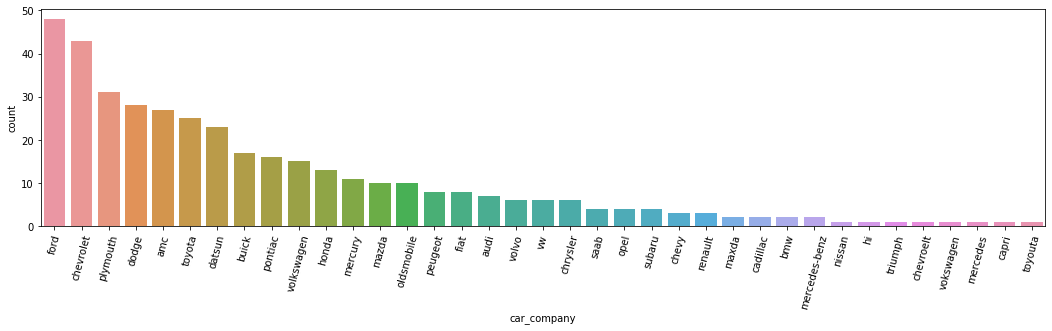

In [34]:
fig = plt.figure(1, (18, 4))

ax1 = plt.subplot(1,1,1)
sns.countplot(df_cat['car_company'], order=df_cat['car_company'].value_counts().index)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=75)

plt.show()

### Insights
- We found that car_name has a lot categories, close to total data points. So it's not fruitfull to do analysis on that as it is unique for most of the points and also in most cases names are safe to be avoided as they doesn't have correlations with other.
- We then create an artificial attribute named car_company by extracting company names from car names. We find that there are much few car companies as compared to car names (around 8 times less).
- We then found that the distribution of car_company is not uniform and most of the proportion is covered by top 15 car companies. Whereas ford and chevrolet alone comprises of around 23% (almost a quater).

### Conclusion
- Every categorical attribute except model_year is highly imbalanced and far from uniform distribution. In all cases most of the data is comprised of top few categories.
- Although model_year is not perfectly uniform but we can think it as uniform-like distribution. This is a digestible assumption for two reasons, first we can clearly see in plot that indeed the distribution is uniform-like and also this is not the entire population but a sample of it so may be in large run it will converge to uniform which may be the true population distribution (Law of Large Number).

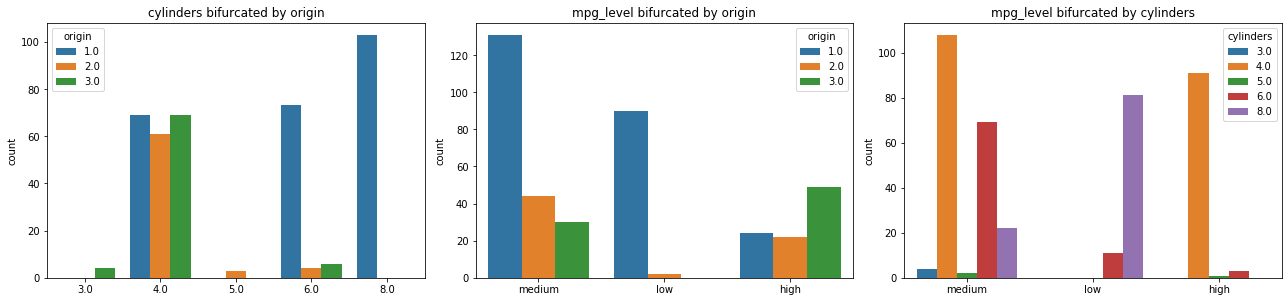

In [35]:
combos = itertools.combinations(['origin', 'cylinders', 'mpg_level'], 2)

fig = plt.figure(1, (18, 8))

i = 0
for pair in combos:
    i+=1
    ax = plt.subplot(2,3,i)
    sns.countplot(x=pair[1], hue=pair[0], data=df_cat)
    ax.set_xlabel(None)
    ax.set_title(f'{pair[1]} bifurcated by {pair[0]}')
    plt.tight_layout()

<b> Cylinders bifurcated by origin </b>

- Japan is the only origin with vehicles having 3 cylinders.
- Europe is the only origin with vehicles having 5 cylinders.
- USA is the only origin with vehicles having 8 cylinders.
- All origins has 4 cylinder vehicles and in almost equal proportion, also because 4 is dominating in cylinders.
- All origins has 6 cylinder vehicles but dominated by USA due the fact that it is dominating in origin.

<b> mpg_level bigurcated by origin </b>

- Japan doesn't have any vehicle with low mpg_level whereas europe has negligible vehicles with low mpg_level and almost all vehicles that has low mpg_level are from usa.
- Japan has the most vehicles with high mpg_level.
- USA has the most vehicles with medium mpg_level (again due to the fact that most vehicles belongs to USA).

<b> mpg_level bigurcated by cylinders </b>

- Vehicles with low mpg_level has either 6 or 8 cylinders and most of them has 8 cylinders.
- Almost all vehicles with high mpg_level has 4 cylinders and with very few (less than 5) has 5-6 cylinders.
- Most vehicles with medium mpg_level has 4,6 & 8 cylinders. This is due to the fact that most of the vehicles has these number of cylinders as we inspected in cylinder distribution earlier.

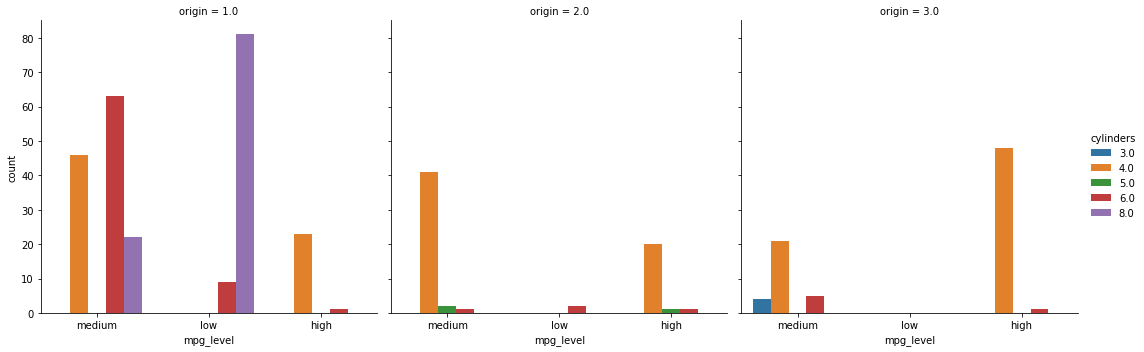

In [36]:
sns.catplot(x='mpg_level', hue='cylinders', col='origin', data=df_cat, kind='count')
plt.show()

- Japan doesn't have any cylinder with low mpg_level and most of it's vehicles have high mpg_level with mostly 4 cylinders(this we already inspected from earlier plots as well, nothing new).
- Almost every vehicle in europe has 4 cylinders and most of them are medium or high.
- USA has few vehicles with high mpg level as compared to other knowing the fact that most of the vehicles belongs to USA.

#### Model Year Vs MPG

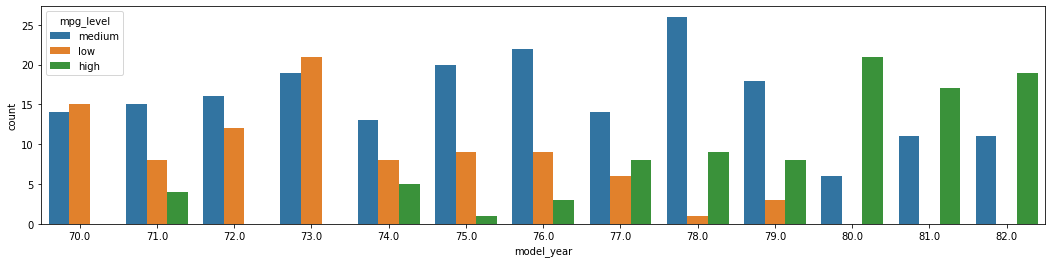

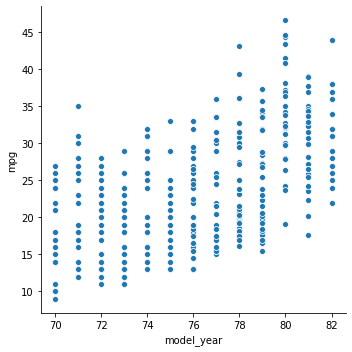

In [37]:
fig = plt.figure(1, (18,4))
sns.countplot(x='model_year', hue='mpg_level', data=df_cat)
sns.relplot(x='model_year', y='mpg', data=df)
plt.show()

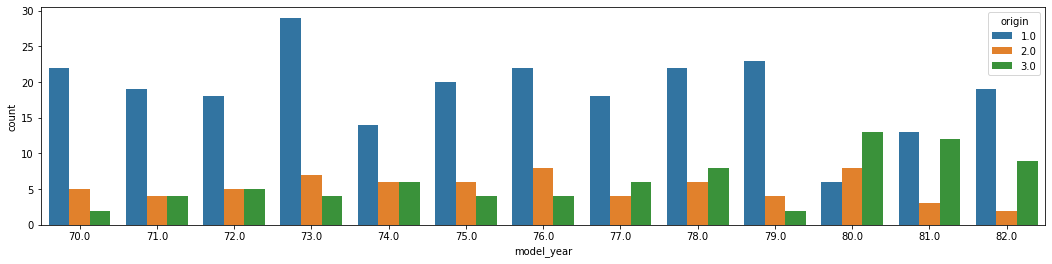

In [38]:
fig = plt.figure(1, (18,4))
sns.countplot(x='model_year', hue='origin', data=df_cat)
plt.show()

In [39]:
top_car_companies = df_cat.car_company.value_counts()[:15].index
top_car_companies

Index(['ford', 'chevrolet', 'plymouth', 'dodge', 'amc', 'toyota', 'datsun',
       'buick', 'pontiac', 'volkswagen', 'honda', 'mercury', 'mazda',
       'oldsmobile', 'peugeot'],
      dtype='object')

In [40]:
df_cat_top_comp = df_cat[df_cat.car_company.isin(top_car_companies)]
df_cat_top_comp.shape

(325, 6)

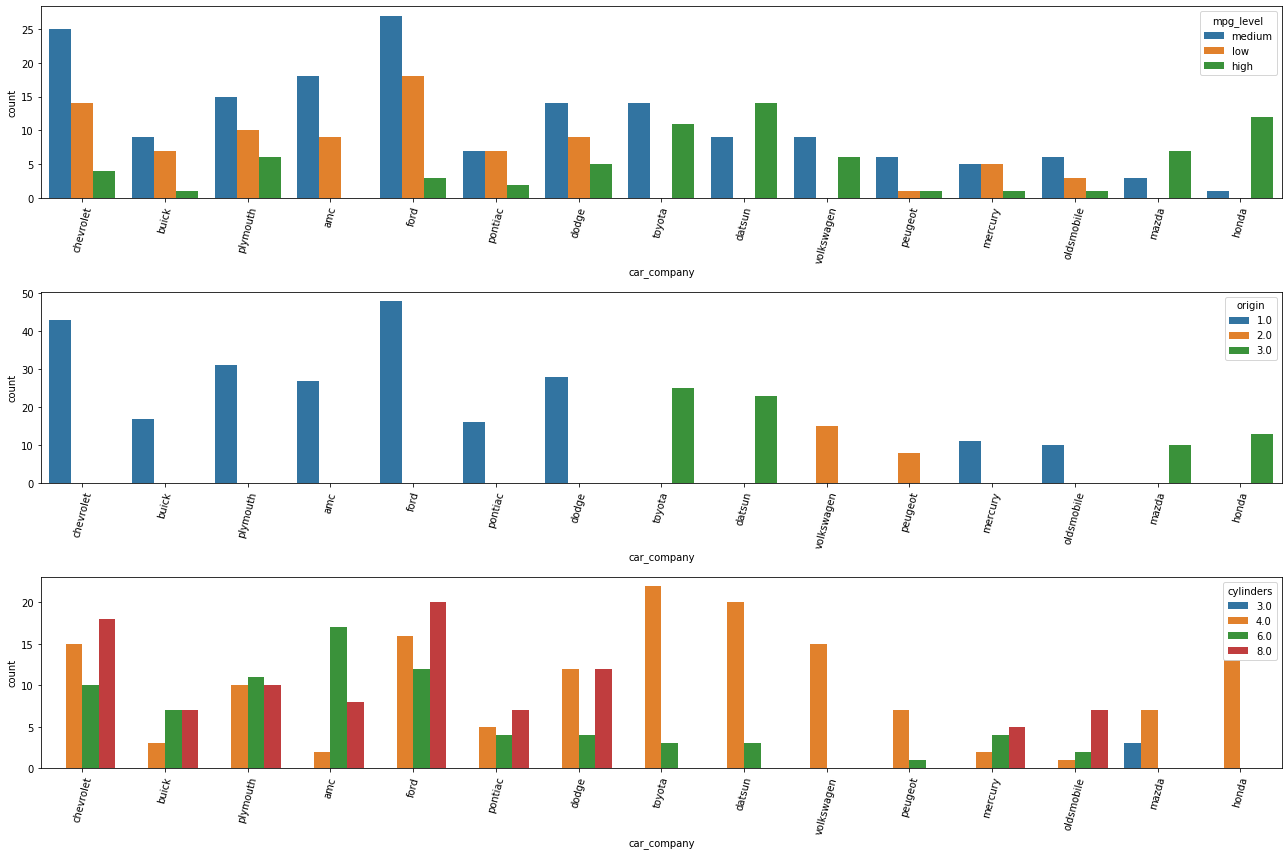

In [42]:
fig = plt.figure(1, (18,12))
for i,cat in enumerate(['mpg_level', 'origin', 'cylinders']):
    ax = plt.subplot(3,1,i+1)
    sns.countplot(x='car_company', hue=cat, data=df_cat_top_comp)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
    plt.tight_layout()

In [43]:
df_num = df[num_columns].copy()
df_num.head()

,mpg,displacement,horsepower,weight,acceleration
0,18.0,307.0,130.0,3504.0,12.0
1,15.0,350.0,165.0,3693.0,11.5
2,18.0,318.0,150.0,3436.0,11.0
3,16.0,304.0,150.0,3433.0,12.0
4,17.0,302.0,140.0,3449.0,10.5


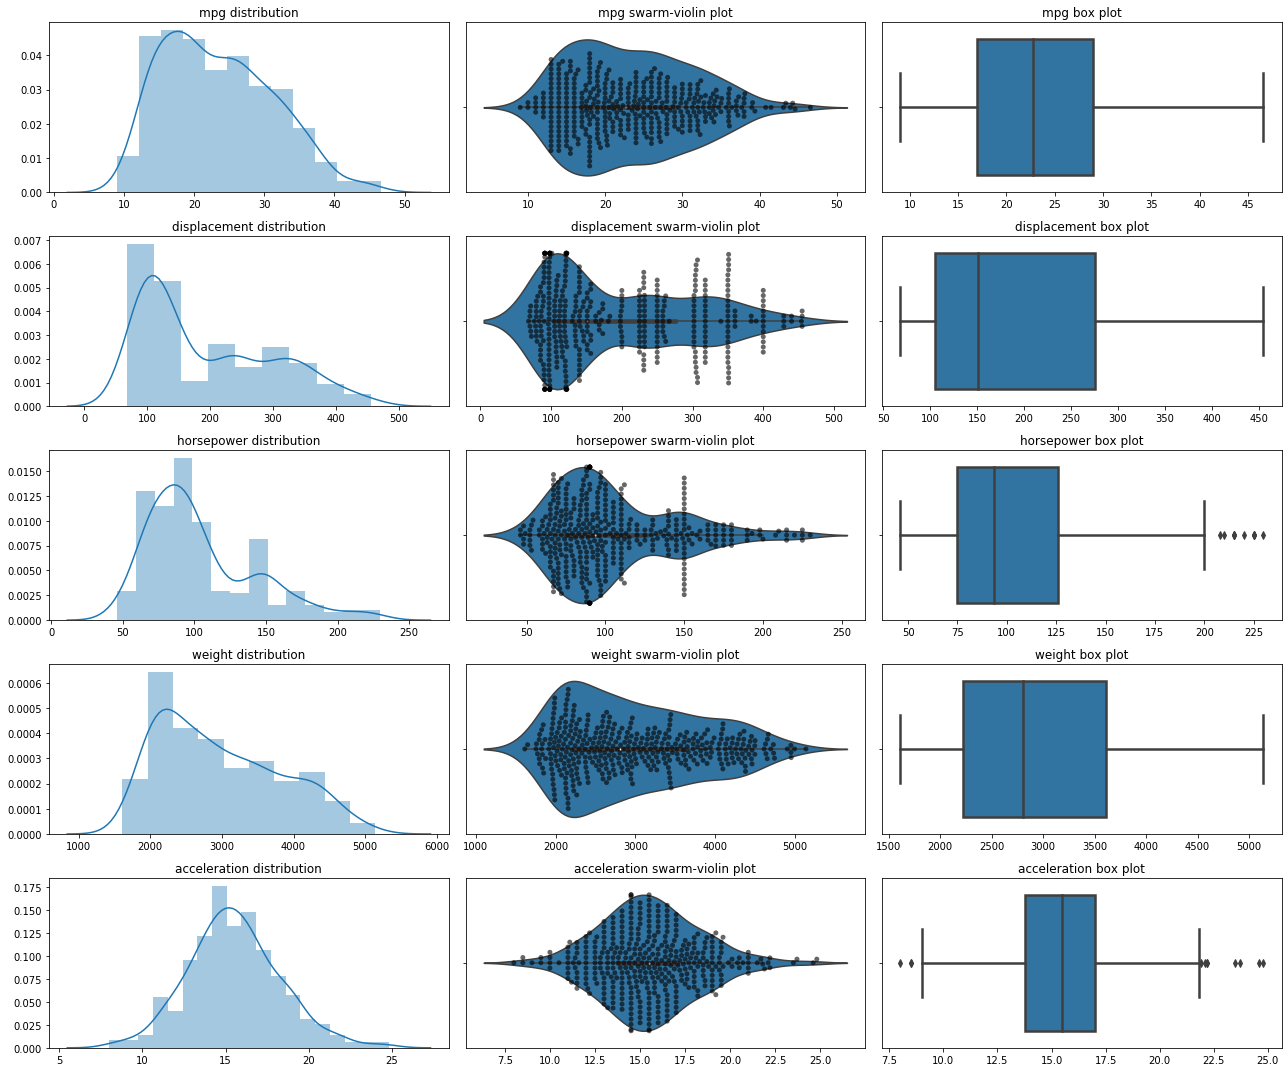

In [45]:

rows = len(num_columns)
cols = 3

fig = plt.figure(1, (18, rows*3))

i = 0
for col in num_columns:
    
    i += 1
    ax1 = plt.subplot(rows, cols,i)
#     ax1.hist(df[col], alpha=0.6)
    sns.distplot(df_num[col])
    ax1.set_xlabel(None)
    ax1.set_title(f'{col} distribution')
    plt.tight_layout()

    i += 1
    ax2 = plt.subplot(rows, cols,i)
    sns.violinplot(df_num[col])
    sns.swarmplot(df_num[col], alpha=0.6, color='k')
    ax2.set_xlabel(None)
    ax2.set_title(f'{col} swarm-violin plot')
    plt.tight_layout()

    i += 1
    ax3 = plt.subplot(rows, cols,i)
    sns.boxplot(df_num[col], orient='h', linewidth=2.5)
    ax3.set_xlabel(None)
    ax3.set_title(f'{col} box plot')
    plt.tight_layout()

- acceleration is the only distribution which is gaussian. There are few values in acceleration which lie outside the whiskers(the bars extending outwards from the box), these are fliers/outliers.
- distributions of mpg & weight seems to be right-skewed gaussian.
- distributions of displacement & horsepower seems to be far from gaussian.

In [46]:
##Let's analyse the outliers using tukey formula.

def tukey_outliers(x):
    q1 = np.percentile(x,25)
    q3 = np.percentile(x,75)
    
    iqr = q3-q1
    
    min_range = q1 - iqr*1.5
    max_range = q3 + iqr*1.5
    
    outliers = x[(x<min_range) | (x>max_range)]
    return outliers

In [47]:
for col in num_columns:
    outliers = tukey_outliers(df_num[col])
    if len(outliers):
        print(f"* {col} has these tukey outliers,\n{outliers}\n")
    else:
        print(f"* {col} doesn't have any tukey outliers.\n")

* mpg doesn't have any tukey outliers.

* displacement doesn't have any tukey outliers.

* horsepower has these tukey outliers,
6      220.0
7      215.0
8      225.0
13     225.0
25     215.0
27     210.0
66     208.0
93     215.0
94     225.0
115    230.0
Name: horsepower, dtype: float64

* weight doesn't have any tukey outliers.

* acceleration has these tukey outliers,
7       8.5
9       8.5
11      8.0
58     23.5
193    22.2
194    22.1
207    21.9
297    24.8
298    22.2
324    23.7
388    24.6
Name: acceleration, dtype: float64



acceleration and horsepower are the only attributes with tukey outliers and we can also notice this from the above boxplots.

In [48]:
df.iloc[list(tukey_outliers(df_num.acceleration).index)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
7,14.0,8.0,440.0,215.0,4312.0,8.5,70.0,1.0,plymouth fury iii
9,15.0,8.0,390.0,190.0,3850.0,8.5,70.0,1.0,amc ambassador dpl
11,14.0,8.0,340.0,160.0,3609.0,8.0,70.0,1.0,plymouth 'cuda 340
58,23.0,4.0,97.0,54.0,2254.0,23.5,72.0,2.0,volkswagen type 3
193,29.0,4.0,85.0,52.0,2035.0,22.2,76.0,1.0,chevrolet chevette
194,24.5,4.0,98.0,60.0,2164.0,22.1,76.0,1.0,chevrolet woody
207,19.0,4.0,120.0,88.0,3270.0,21.9,76.0,2.0,peugeot 504
297,27.2,4.0,141.0,71.0,3190.0,24.8,79.0,2.0,peugeot 504
298,23.9,8.0,260.0,90.0,3420.0,22.2,79.0,1.0,oldsmobile cutlass salon brougham
324,43.4,4.0,90.0,48.0,2335.0,23.7,80.0,2.0,vw dasher (diesel)


Outliers in acceleration seems to be random nothing conclusive. One thing we can notice that none of them are from japan.

In [49]:
df.iloc[list(tukey_outliers(df_num.horsepower).index)]


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
6,14.0,8.0,454.0,220.0,4354.0,9.0,70.0,1.0,chevrolet impala
7,14.0,8.0,440.0,215.0,4312.0,8.5,70.0,1.0,plymouth fury iii
8,14.0,8.0,455.0,225.0,4425.0,10.0,70.0,1.0,pontiac catalina
13,14.0,8.0,455.0,225.0,3086.0,10.0,70.0,1.0,buick estate wagon (sw)
25,10.0,8.0,360.0,215.0,4615.0,14.0,70.0,1.0,ford f250
27,11.0,8.0,318.0,210.0,4382.0,13.5,70.0,1.0,dodge d200
66,11.0,8.0,429.0,208.0,4633.0,11.0,72.0,1.0,mercury marquis
93,13.0,8.0,440.0,215.0,4735.0,11.0,73.0,1.0,chrysler new yorker brougham
94,12.0,8.0,455.0,225.0,4951.0,11.0,73.0,1.0,buick electra 225 custom
115,16.0,8.0,400.0,230.0,4278.0,9.5,73.0,1.0,pontiac grand prix


Outliers in horsepower are not seeming random, there is a lot common in them
- All of them are from usa (maybe because vehicles from usa are in majority).
- All of them has 8 cylinders.
- All of them has low mpg level.
- All of them has weight in the range 4000.
- Most of them has displacement in range 400.
- Most of them were manufactured in early years(before 74).

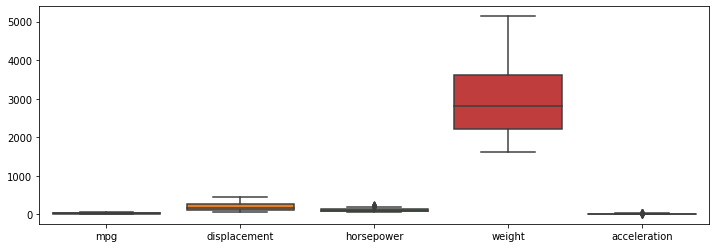

In [50]:
# see data is not scaled properly, we need to scale it for modelling but works fine for analysis.
fig = plt.figure(1, (12, 4))
ax = plt.subplot(1,1,1)
sns.boxplot(x="variable", y="value", data=pd.melt(df_num))
plt.xlabel(None)
plt.ylabel(None)
plt.show()

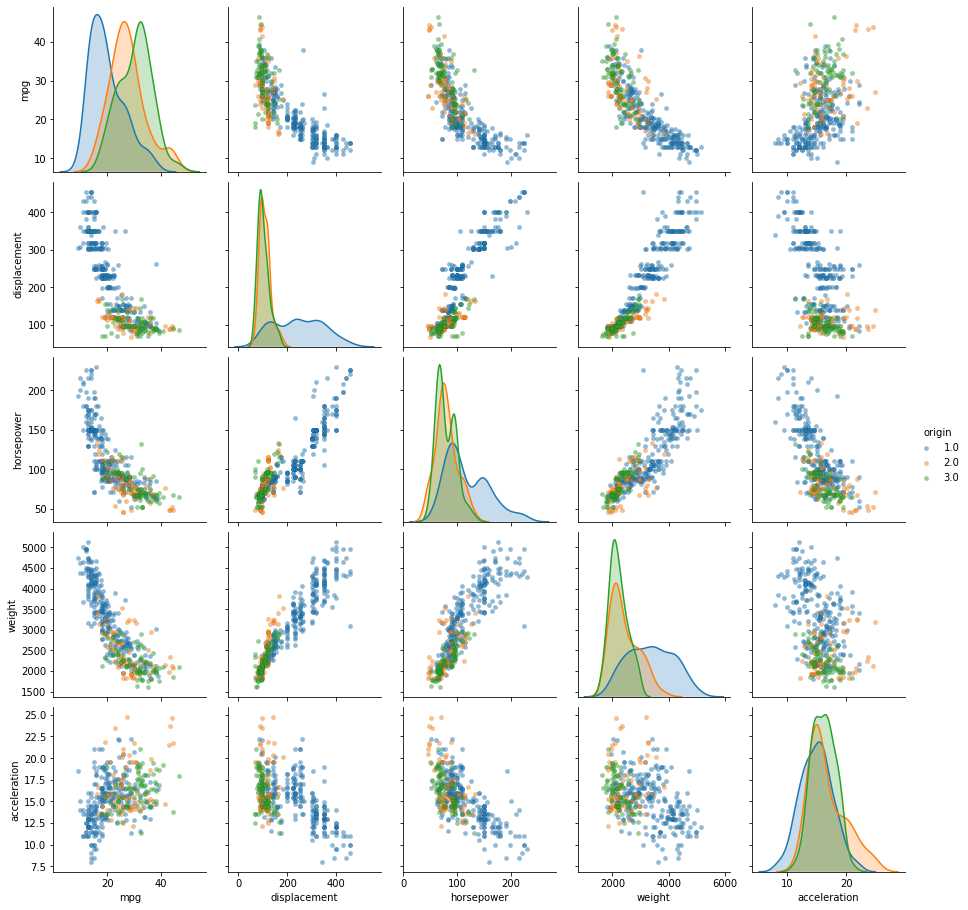

In [51]:
sns.pairplot(data=df, vars=num_columns, diag_kind='kde', hue='origin',
            plot_kws=dict(s=20, edgecolor="k", linewidth=0.1, alpha=0.5), diag_kws=dict(shade=True))
plt.show()

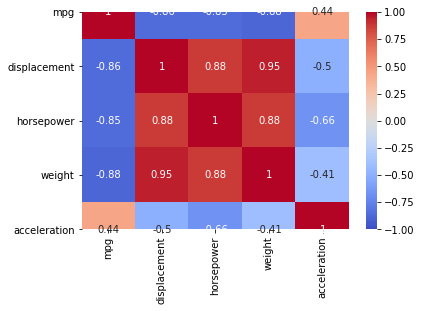

In [53]:
sns.heatmap(df_num.corr(method='spearman'), annot = True, vmin = -1, vmax = 1, center = 0, cmap = 'coolwarm')
plt.show()

- as mpg increases displacement, horsepower & weight decreases but acceleration increases.
- as horsepower increases displacement & weight increases but acceleration decreases.
- as weight increases displacement increases but acceleration decreases.
- as acceleration increases displacement decreases.

In [63]:
df = pd.concat((df, df_cat['mpg_level'] ),axis=1)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,mpg_level
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu,medium
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320,low
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite,medium
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst,low
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino,medium


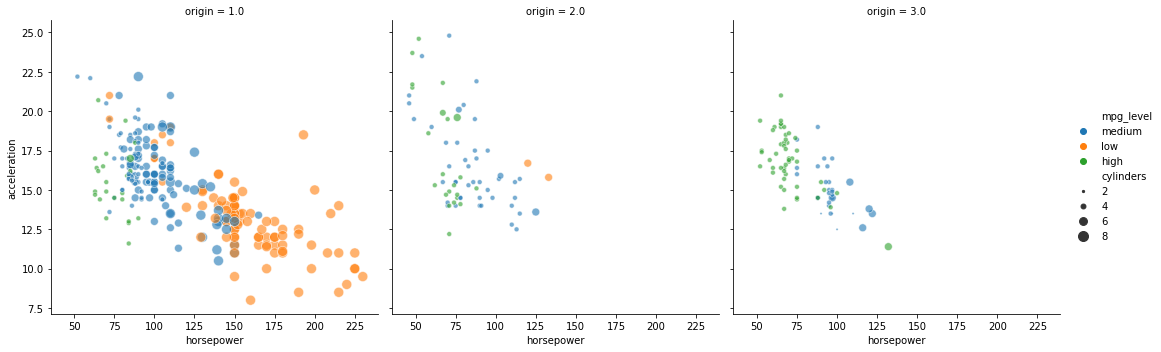

In [64]:
sns.relplot(x='horsepower', y='acceleration', hue='mpg_level', #style='mpg_level',
            size='cylinders', col='origin', data=df, kind='scatter', sizes=(5, 100), alpha=0.6)
plt.show()

- In every region there is a negative relation b/w horsepower & acceleration.
- vehicles with low mpg has low acceleration and high horsepower.
- vehicles with more cylinders has low acceleration and high horsepower

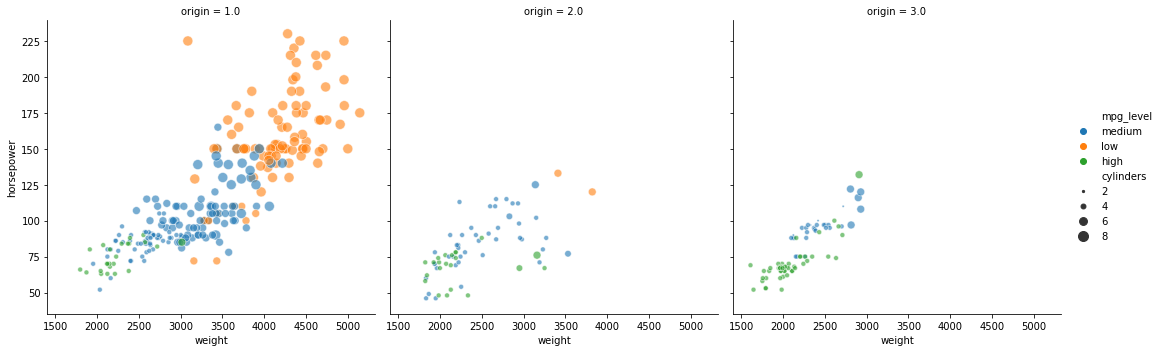

In [65]:
'''In this plot we analyze the relationship of weight & horsepower
bifurcated by origin, mpg_level & cylinders in a single plot.'''

sns.relplot(x='weight', y='horsepower', hue='mpg_level', #style='mpg_level',
            size='cylinders', col='origin', data=df, kind='scatter', sizes=(5, 100), alpha=0.6)
plt.show()

- In every region there is a positive relation b/w weight & horsepower.
- vehicles with low mpg has high weight & horsepower.
- vehicles with more cylinders has high weight & horsepower.

### relationship between numerical and categorical attributes

variation of numerical features with origin


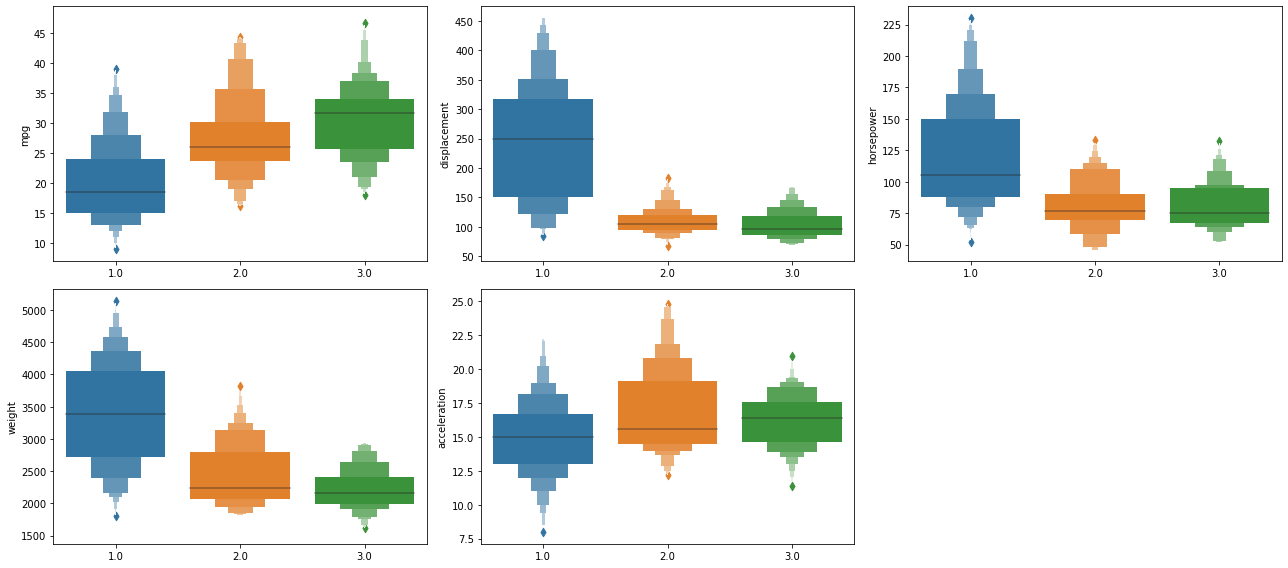

In [67]:
print('variation of numerical features with origin')

fig = plt.figure(1, (18, 8))

for idx,col in enumerate(num_columns):
    ax = plt.subplot(2, 3, idx+1)
    sns.boxenplot(x='origin', y=col, data=df)
    ax.set_xlabel(None)
    plt.tight_layout()

- vehicles of usa has less mpg on an average as compared to japan & europe.
- vehicles of usa has more displacement, horsepower and weight as compared to japan & europe.
- all vehicles has relatively same acceleration irrespective of the origin but distribution of acceleration from usa is more spreaded due to the fact that it comprises a lot vehicles compared to other.

variation of numerical features with mpg_level


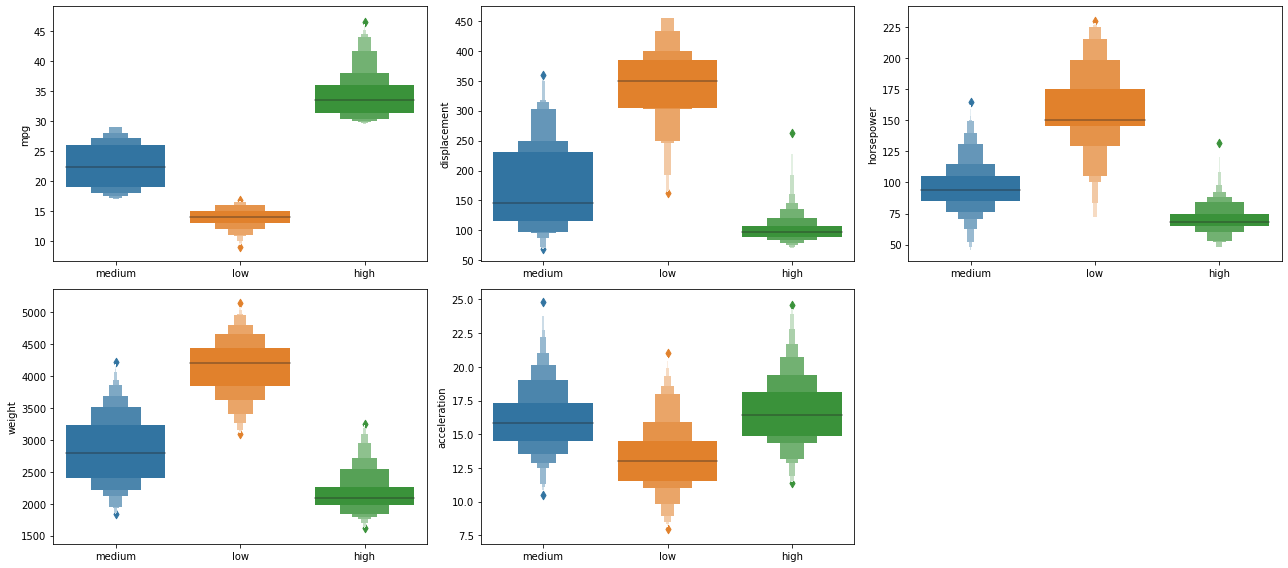

In [69]:
print('variation of numerical features with mpg_level')

fig = plt.figure(1, (18, 8))

for idx,col in enumerate(num_columns):
    ax = plt.subplot(2, 3, idx+1)
    sns.boxenplot(x='mpg_level', y=col, data=df)
    ax.set_xlabel(None)
    plt.tight_layout()

- as mpg_level increases displacement decreases on average.
- as mpg_level increases horsepower decreases on average.
- as mpg_level increases weight decreases on average.
- vehicles with low mpg_level usually has less acceleration compared to other whereas vehicles with medium and high mpg_level has same acceleration.

variation of numerical features with cylinders


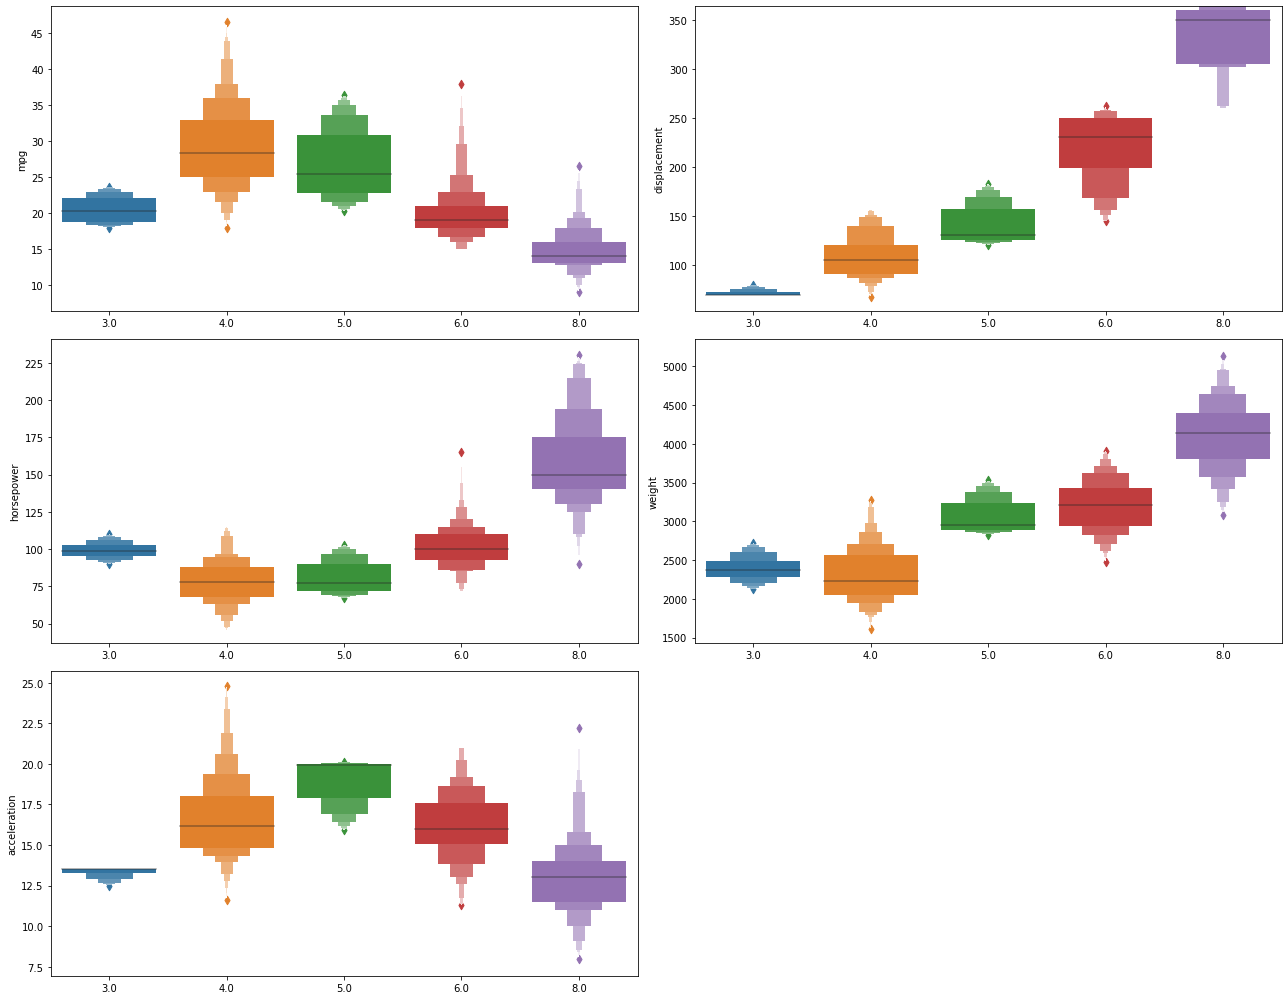

In [71]:
print('variation of numerical features with cylinders')

fig = plt.figure(1, (18, 14))

for idx,col in enumerate(num_columns):
    ax = plt.subplot(3, 2, idx+1)
    sns.boxenplot(x='cylinders', y=col, data=df)
    ax.set_xlabel(None)
    plt.tight_layout()

- as cylinders increases from 3 to 4 mpg also increases but on further increasing the cylinders mpg starts decreasing.
- displacement increases in polynomial order as cylinders increases.
- as cylinders increases from 3 to 5 horsepower decreases but on further increasing the cylinders it starts increasing.
- on increasing cylinders vehicle's weight increases on average (very obvious).
- as cylinders increases from 3 to 5 vehicle's acceleration also increases but on further increasing the cylinders it starts decreasing(maybe due to the fact that vehicles with more cylinders have more weight and hence less acceleration).

variation of numerical features with model_year


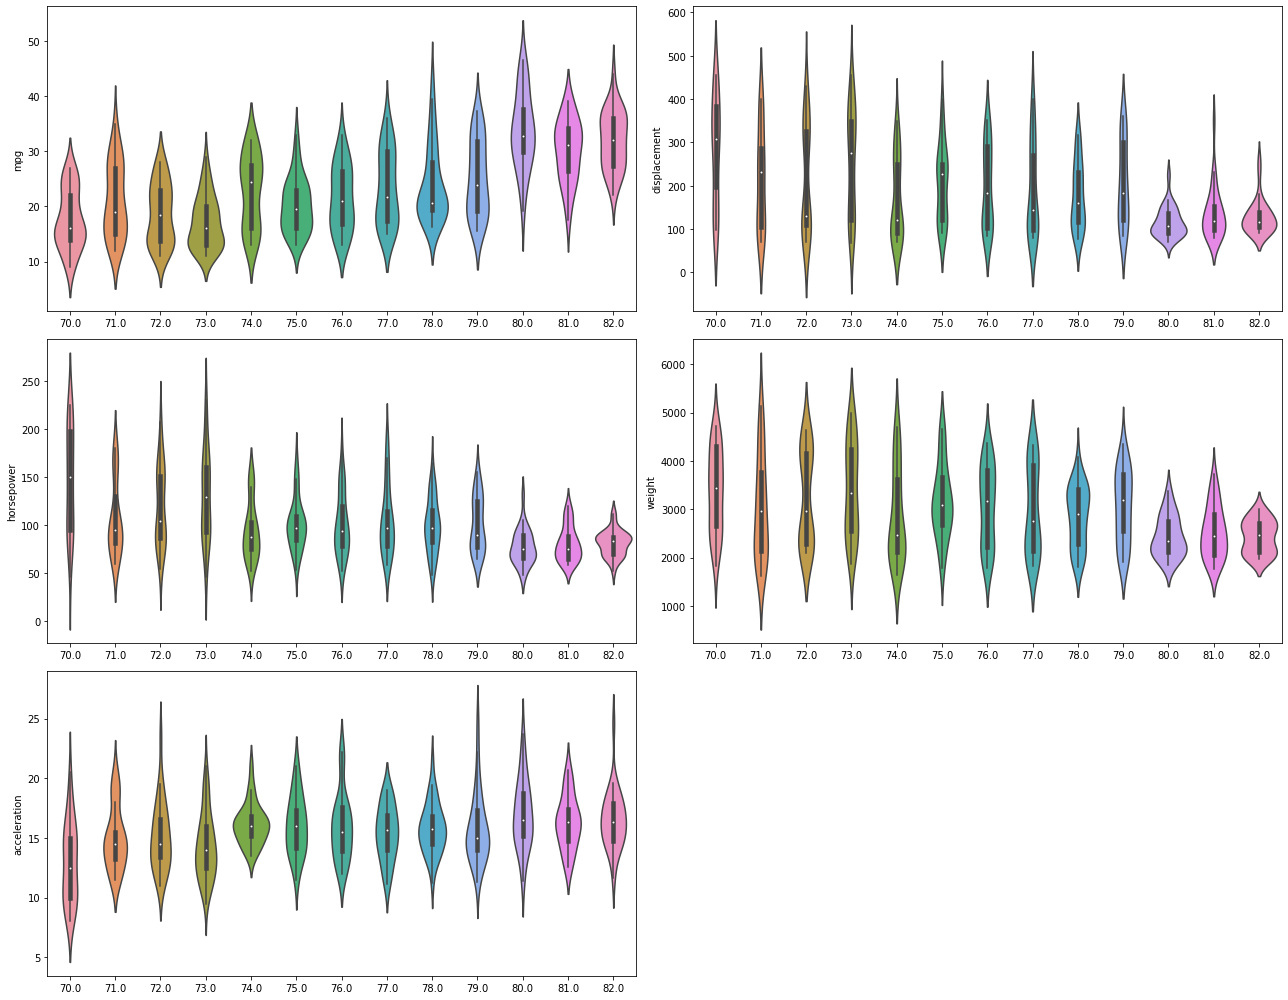

In [72]:
print('variation of numerical features with model_year')

fig = plt.figure(1, (18, 14))
# fig.tight_layout()

for idx,col in enumerate(num_columns):
    ax = plt.subplot(3, 2, idx+1)
    sns.violinplot(x='model_year', y=col, data=df)
    ax.set_xlabel(None)
    plt.tight_layout()

variation of numerical features with model_year bifurcated by origin


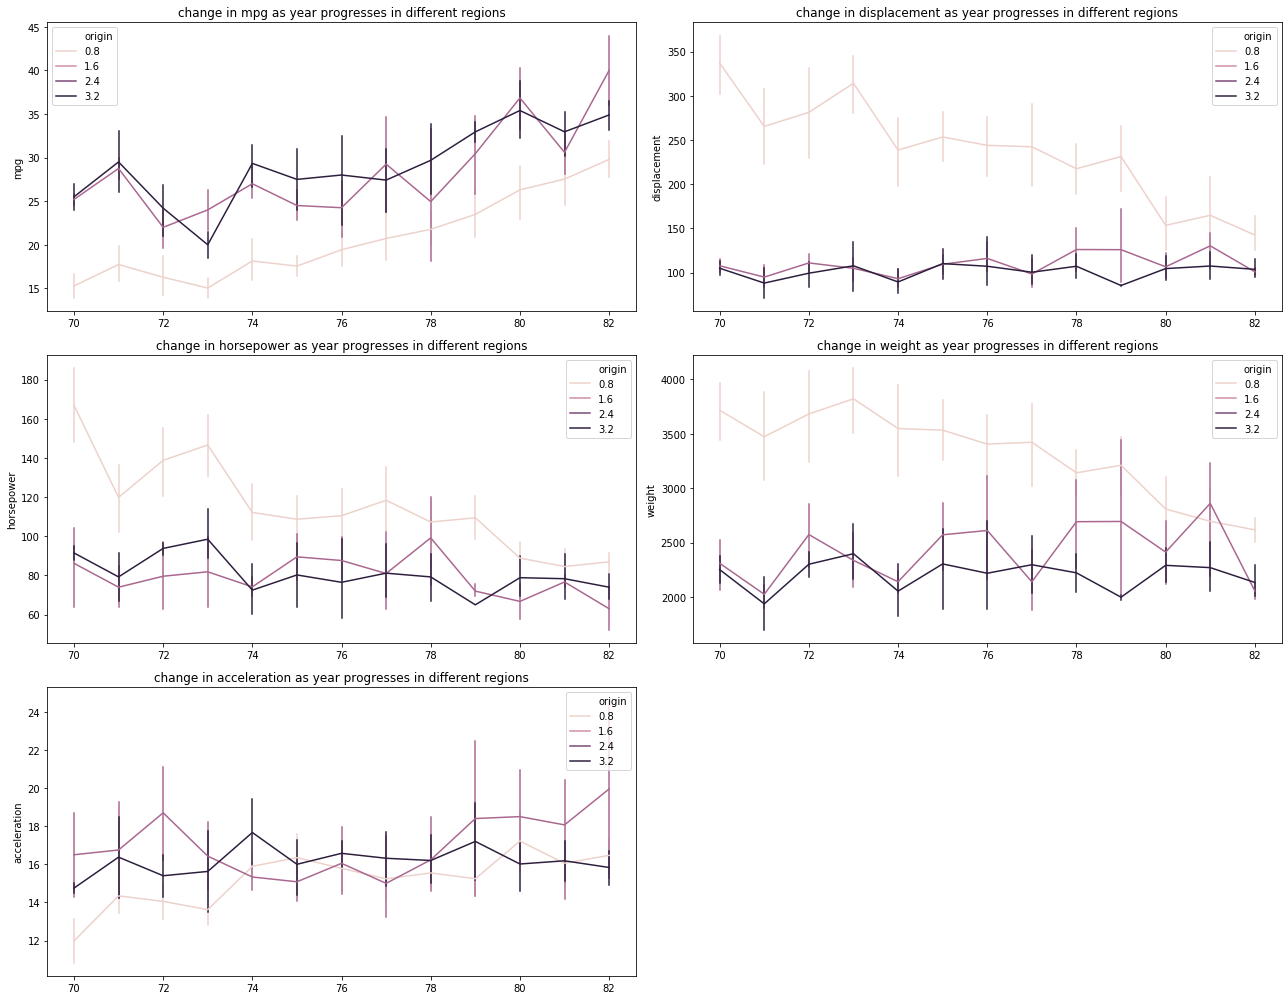

In [73]:
print('variation of numerical features with model_year bifurcated by origin')

fig = plt.figure(1, (18, 14))
# fig.tight_layout()

for idx,col in enumerate(num_columns):
    ax = plt.subplot(3, 2, idx+1)
    sns.lineplot(x="model_year", y=col, hue='origin', data=df, err_style='bars')
    ax.set_title(f'change in {col} as year progresses in different regions')
    ax.set_xlabel(None)
    plt.tight_layout()

plt.show()

### Fisher’s exact test
Fisher’s exact test is used to determine whether there is a significant association between two categorical variables in a contingency table. Fisher’s exact test is an alternative to Pearson’s chi-squared test for independence. While actually valid for all sample sizes, Fisher’s exact test is practically applied when sample sizes are small. A general recommendation is to use Fisher’s exact test- instead of the chi-squared test - whenever more than 20 % of cells in a contingency table have expected frequencies < 5.

In [79]:
ALPHA = 0.05

In [74]:
# Contingency Table (aka frequency table)
pd.crosstab(df.origin, df.model_year)

model_year,70.0,71.0,72.0,73.0,74.0,75.0,76.0,77.0,78.0,79.0,80.0,81.0,82.0
origin,,,,,,,,,,,,,
1.0,22,19,18,29,14,20,22,18,22,23,6,13,19
2.0,5,4,5,7,6,6,8,4,6,4,8,3,2
3.0,2,4,5,4,6,4,4,6,8,2,13,12,9


In [78]:
## chi square test

chi2, p, dof, expected_values = stats.chi2_contingency(pd.crosstab(df.origin, df.model_year).values)
chi2, p, dof, expected_values

(47.30041642378076,
 0.003078147787614689,
 24,
 array([[18.125     , 16.875     , 17.5       , 25.        , 16.25      ,
         18.75      , 21.25      , 17.5       , 22.5       , 18.125     ,
         16.875     , 17.5       , 18.75      ],
        [ 5.03061224,  4.68367347,  4.85714286,  6.93877551,  4.51020408,
          5.20408163,  5.89795918,  4.85714286,  6.24489796,  5.03061224,
          4.68367347,  4.85714286,  5.20408163],
        [ 5.84438776,  5.44132653,  5.64285714,  8.06122449,  5.23979592,
          6.04591837,  6.85204082,  5.64285714,  7.25510204,  5.84438776,
          5.44132653,  5.64285714,  6.04591837]]))

In [80]:
if p <= ALPHA:
    print(f'Rejected H0 under significance level {ALPHA} `origin` & `model_year` are dependent.')
else:
    print(f'Fail to reject H0 due to lack of evidence under significance level {ALPHA} `origin` & `model_year` are independent.')

Rejected H0 under significance level 0.05 `origin` & `model_year` are dependent.


In [81]:
observed_values = pd.crosstab(df.origin, df.mpg_level).values
observed_values

array([[ 24,  90, 131],
       [ 22,   2,  44],
       [ 49,   0,  30]], dtype=int64)

In [82]:
import scipy.stats as stats
chi2, p, dof, expected_values = stats.chi2_contingency(observed_values)
chi2, p, dof, expected_values

(123.76491109767298,
 8.381476294026467e-26,
 4,
 array([[ 59.375     ,  57.5       , 128.125     ],
        [ 16.47959184,  15.95918367,  35.56122449],
        [ 19.14540816,  18.54081633,  41.31377551]]))

In [84]:
if p <= ALPHA:
    print(f'Rejected H0 under significance level {ALPHA} `origin` & `mpg_level` are dependent.')
else:
    print(f'Fail to reject H0 due to lack of evidence under significance level {ALPHA} `origin` & `mpg_level` are independent.')

Rejected H0 under significance level 0.05 `origin` & `mpg_level` are dependent.


In [101]:
df_cat.head()

,origin,model_year,cylinders,mpg_level,car_company,car_name
0,1.0,70.0,8.0,medium,chevrolet,chevelle malibu
1,1.0,70.0,8.0,low,buick,skylark 320
2,1.0,70.0,8.0,medium,plymouth,satellite
3,1.0,70.0,8.0,low,amc,rebel sst
4,1.0,70.0,8.0,medium,ford,torino


In [111]:
#Sklearn also has chi2 test available let's use it to test dependency of all categorical attributes with `mpg_level`
from sklearn.preprocessing import LabelEncoder
# df_cat_label =  pd.concat([df.loc[:, ['origin', 'mpg_level']].apply(lambda x: LabelEncoder().fit_transform(x)),
#                            df.loc[: , 'cylinders': 'model_year']], axis=1)

df_cat_label = pd.concat([df_cat.loc[:,['mpg_level']].apply(lambda x: LabelEncoder().fit_transform(x)),
                         df_cat[['origin','model_year','cylinders']]],axis=1)

In [112]:
df_cat_label

,mpg_level,origin,model_year,cylinders
0,2,1.0,70.0,8.0
1,1,1.0,70.0,8.0
2,2,1.0,70.0,8.0
3,1,1.0,70.0,8.0
4,2,1.0,70.0,8.0
...,...,...,...,...
387,2,1.0,82.0,4.0
388,0,2.0,82.0,4.0
389,0,1.0,82.0,4.0
390,2,1.0,82.0,4.0


In [113]:
from sklearn import feature_selection

chi2_res = feature_selection.chi2(df_cat_label, df.mpg_level)
df_chi2 = pd.DataFrame({
    'attr1': 'mpg_level',
    'attr2': df_cat_label.columns,
    'chi2': chi2_res[0],
    'p': chi2_res[1],
    'alpha': ALPHA
})
df_chi2['H0'] = df_chi2.p.apply(lambda x: 'rejected' if x <= ALPHA else 'fail to reject')
df_chi2['relation'] = df_chi2.H0.apply(lambda x: 'dependent' if x=='rejected' else 'independent')
df_chi2

,attr1,attr2,chi2,p,alpha,H0,relation
0,mpg_level,mpg_level,210.159363,2.314591e-46,0.05,rejected,dependent
1,mpg_level,origin,46.994002,6.242839e-11,0.05,rejected,dependent
2,mpg_level,model_year,21.742075,1.900065e-05,0.05,rejected,dependent
3,mpg_level,cylinders,127.418999,2.144450e-28,0.05,rejected,dependent


In [114]:
chi2_res = feature_selection.chi2(df_cat_label, df.origin)
df_chi2 = pd.DataFrame({
    'attr1': 'origin',
    'attr2': df_cat_label.columns,
    'chi2': chi2_res[0],
    'p': chi2_res[1],
    'alpha': ALPHA
})
df_chi2['H0'] = df_chi2.p.apply(lambda x: 'rejected' if x <= ALPHA else 'fail to reject')
df_chi2['relation'] = df_chi2.H0.apply(lambda x: 'dependent' if x=='rejected' else 'independent')
df_chi2

,attr1,attr2,chi2,p,alpha,H0,relation
0,origin,mpg_level,21.513563,2.130046e-05,0.05,rejected,dependent
1,origin,origin,160.925566,1.136207e-35,0.05,rejected,dependent
2,origin,model_year,2.793869,2.473540e-01,0.05,fail to reject,independent
3,origin,cylinders,77.514452,1.472145e-17,0.05,rejected,dependent


In [115]:
chi2_res = feature_selection.chi2(df_cat_label, df.cylinders)
df_chi2 = pd.DataFrame({
    'attr1': 'cylinders',
    'attr2': df_cat_label.columns,
    'chi2': chi2_res[0],
    'p': chi2_res[1],
    'alpha': ALPHA
})
df_chi2['H0'] = df_chi2.p.apply(lambda x: 'rejected' if x <= ALPHA else 'fail to reject')
df_chi2['relation'] = df_chi2.H0.apply(lambda x: 'dependent' if x=='rejected' else 'independent')
df_chi2

,attr1,attr2,chi2,p,alpha,H0,relation
0,cylinders,mpg_level,25.065514,4.880665e-05,0.05,rejected,dependent
1,cylinders,origin,57.587476,9.314584e-12,0.05,rejected,dependent
2,cylinders,model_year,9.110095,5.840578e-02,0.05,fail to reject,independent
3,cylinders,cylinders,207.913753,7.466432e-44,0.05,rejected,dependent


In [116]:
chi2_res = feature_selection.chi2(df_cat_label, df.model_year)
df_chi2 = pd.DataFrame({
    'attr1': 'model_year',
    'attr2': df_cat_label.columns,
    'chi2': chi2_res[0],
    'p': chi2_res[1],
    'alpha': ALPHA
})
df_chi2['H0'] = df_chi2.p.apply(lambda x: 'rejected' if x <= ALPHA else 'fail to reject')
df_chi2['relation'] = df_chi2.H0.apply(lambda x: 'dependent' if x=='rejected' else 'independent')
df_chi2

,attr1,attr2,chi2,p,alpha,H0,relation
0,model_year,mpg_level,37.612697,1.776224e-04,0.05,rejected,dependent
1,model_year,origin,15.853531,1.980371e-01,0.05,fail to reject,independent
2,model_year,model_year,69.832393,3.442791e-10,0.05,rejected,dependent
3,model_year,cylinders,37.825478,1.639800e-04,0.05,rejected,dependent


In [120]:
!pip install statsmodels

  Using cached patsy-0.5.1-py2.py3-none-any.whl (231 kB)


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


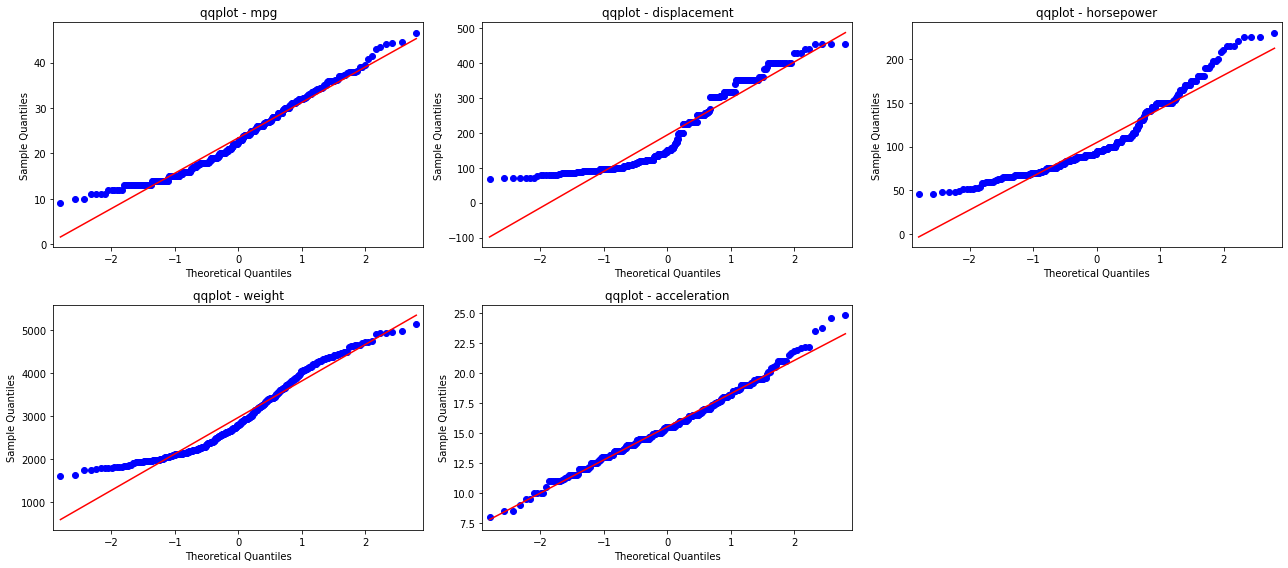

In [121]:
from statsmodels.graphics.gofplots import qqplot
# quantile-quantile plots on original data
fig = plt.figure(1, (18,8))

for i,num in enumerate(num_columns):
    ax = plt.subplot(2,3,i+1)
    qqplot(df[num], line= 's', ax=ax)
    ax.set_title(f'qqplot - {num}')
    plt.tight_layout()

In [122]:
def shapiro_wilk_test(df: pd.DataFrame, cols: list, alpha=0.05):
    # test the null hypothesis for columns given in `cols` of the dataframe `df` under significance level `alpha`.
    for col in cols:
        _,p = stats.shapiro(df[col])
        if p <= alpha:
            print(f'''\nRejected H0 under significance level {alpha}\n{col} doesn't seems to be normally distributed''')
        else:
            print(f'''\nFail to reject H0 due to lack of evidence under significance level {alpha}\n{col} seem to be normally distributed''')

In [123]:
shapiro_wilk_test(df, num_columns)



Rejected H0 under significance level 0.05
mpg doesn't seems to be normally distributed

Rejected H0 under significance level 0.05
displacement doesn't seems to be normally distributed

Rejected H0 under significance level 0.05
horsepower doesn't seems to be normally distributed

Rejected H0 under significance level 0.05
weight doesn't seems to be normally distributed

Rejected H0 under significance level 0.05
acceleration doesn't seems to be normally distributed


In [124]:
_, p = stats.shapiro(df.acceleration)
p

0.03054318018257618

In [125]:
from sklearn.preprocessing import PowerTransformer

df_tfnum = pd.DataFrame(PowerTransformer().fit_transform(df[num_columns]), columns=num_columns)
df_tfnum.head()

C:\Users\divya\Anaconda3\envs\kaggle\lib\site-packages\sklearn\preprocessing\_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


,mpg,displacement,horsepower,weight,acceleration
0,-0.635451,1.119336,0.854984,0.0,-1.317572
1,-1.142697,1.324530,1.443754,0.0,-1.522941
2,-0.635451,1.175211,1.216062,0.0,-1.732292
3,-0.965340,1.103648,1.216062,0.0,-1.317572
4,-0.796543,1.093078,1.044925,0.0,-1.945873


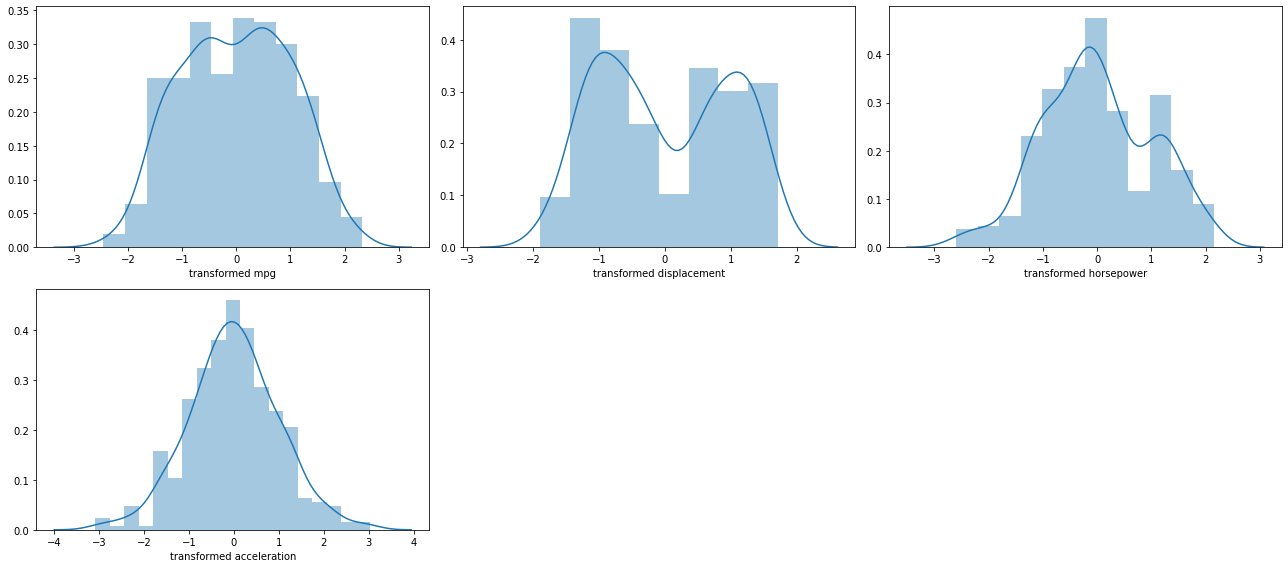

In [128]:
fig = plt.figure(1, (18,8))

for i,num in enumerate(['mpg', 'displacement', 'horsepower', 'acceleration']):
    ax = plt.subplot(2,3,i+1)
    sns.distplot(df_tfnum[num])
    ax.set_xlabel(f'transformed {num}')
    plt.tight_layout()

Power transforms does two things, first it scaled the data i.e., now data is centered at 0 and also made the distribution more gaussian-like simultaneously preserving the original structure. It does so by applying transformations like square-root, log etc.

acceleration is still gaussian, skewness is removed from mpg & weight making mpg gaussian-like. Also the distribution for displacement is improved now it's bimodal which respects the observation.

One thing you have noticed that after applying power transform distribution of mpg & weight is quite similar to what we get on applying log transform.

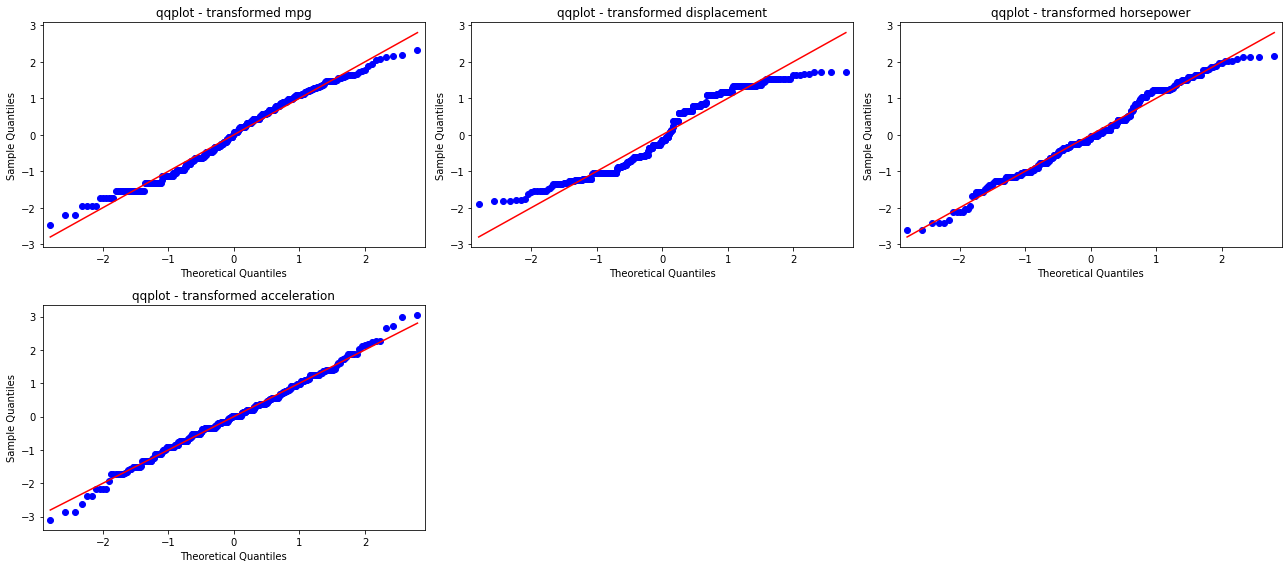

In [129]:
# quantile-quantile plots on transformed data
fig = plt.figure(1, (18,8))

for i,num in enumerate(['mpg', 'displacement', 'horsepower', 'acceleration']):
    ax = plt.subplot(2,3,i+1)
    qqplot(df_tfnum[num], line='s', ax=ax)
    ax.set_title(f'qqplot - transformed {num}')
    plt.tight_layout()

In [130]:
shapiro_wilk_test(df_tfnum, ['mpg', 'displacement', 'horsepower', 'acceleration'])



Rejected H0 under significance level 0.05
mpg doesn't seems to be normally distributed

Rejected H0 under significance level 0.05
displacement doesn't seems to be normally distributed

Rejected H0 under significance level 0.05
horsepower doesn't seems to be normally distributed

Fail to reject H0 due to lack of evidence under significance level 0.05
acceleration seem to be normally distributed


In [131]:
_, p = stats.shapiro(df_tfnum.acceleration)
p

0.3864997923374176

In [133]:
#H0 : mpg and other attribute are not correlated.         α=0.05 
for num in num_columns:
    if num == 'mpg':
        continue
    
    corr, p = stats.spearmanr(df.mpg, df[num])

    print(f'\n* `mpg` & `{num}`\n')
    print(f'corr: {round(corr, 4)} \t p: {p}')

    if p <= ALPHA:
        print(f'Rejected H0 under significance level {ALPHA}, mpg & {num} are correlated')
    else:
        print(f'''Fail to reject H0 due to lack of evidence under significance level {ALPHA}, 
              mpg & {num} are not correlated''')


* `mpg` & `displacement`

corr: -0.8552 	 p: 2.195777599322618e-113
Rejected H0 under significance level 0.05, mpg & displacement are correlated

* `mpg` & `horsepower`

corr: -0.8536 	 p: 1.619383245501938e-112
Rejected H0 under significance level 0.05, mpg & horsepower are correlated

* `mpg` & `weight`

corr: -0.8756 	 p: 2.6623779380252216e-125
Rejected H0 under significance level 0.05, mpg & weight are correlated

* `mpg` & `acceleration`

corr: 0.4415 	 p: 3.9036035663531793e-20
Rejected H0 under significance level 0.05, mpg & acceleration are correlated


In [134]:
def test_correlation(x1, x2, method='spearman', alpha=0.05):
    # this function returns correlation, p-value and H0 for `x1` & `x2`
    
    ALLOWED_METHODS = ['pearson', 'spearman', 'kendall']
    if method not in ALLOWED_METHODS:
        raise ValueError(f'allowed methods are {ALLOWED_METHODS}')
        
    if method=='pearson':
        corr, p = stats.pearsonr(x1,x2)
    elif method=='spearman':
        corr, p = stats.spearmanr(x1,x2)
    else:
        corr, p = stats.kendalltau(x1,x2)
    
    h0 = (
    'rejected'
    if p<=ALPHA else
    'fail to reject')
    
    return corr, p, h0

In [135]:
df_corr = pd.DataFrame(columns=['attr1', 'attr2', 'corr', 'p', 'H0'])

for combo in itertools.combinations(num_columns, r=2):
    corr, p, h0 = test_correlation(df[combo[0]], df[combo[1]])
    df_corr = df_corr.append({'attr1':combo[0], 'attr2':combo[1],
                              'corr':round(corr, 5), 'p':p, 'H0':h0}, ignore_index=True)
    
df_corr

,attr1,attr2,corr,p,H0
0,mpg,displacement,-0.85523,2.195778e-113,rejected
1,mpg,horsepower,-0.85362,1.619383e-112,rejected
2,mpg,weight,-0.87559,2.662378e-125,rejected
3,mpg,acceleration,0.44154,3.903604e-20,rejected
4,displacement,horsepower,0.87617,1.126737e-125,rejected
5,displacement,weight,0.94563,2.463170e-192,rejected
6,displacement,acceleration,-0.49940,4.061210e-26,rejected
7,horsepower,weight,0.87882,2.182674e-127,rejected
8,horsepower,acceleration,-0.65814,5.157840e-50,rejected
9,weight,acceleration,-0.40511,6.484246e-17,rejected


In [138]:
df.origin

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
387    1.0
388    2.0
389    1.0
390    1.0
391    1.0
Name: origin, Length: 392, dtype: float64

In [139]:
#Let's test whether acceleration in `japan` and `usa` has the same mean.
shapiro_wilk_test(df[df.origin==3], ['acceleration'])
shapiro_wilk_test(df[df.origin==1], ['acceleration'])



Fail to reject H0 due to lack of evidence under significance level 0.05
acceleration seem to be normally distributed

Fail to reject H0 due to lack of evidence under significance level 0.05
acceleration seem to be normally distributed


So both are normally distributed so we can apply parametric test.
H0 : acceleration of japan and acceleration of usa has same sample mean.        α=0.05

In [142]:
# because the variance is not same for the two distributions hence equal_var=False
_, p = stats.ttest_ind(df[df.origin==3].acceleration, df[df.origin==1].acceleration, equal_var=False)

if p <= ALPHA:
    print(f'Rejected H0 under {ALPHA*100}% significance, Different distributions.')
else:
    print(f'Fail to Reject H0 under {ALPHA*100}% significance, Same distributions.')

Rejected H0 under 5.0% significance, Different distributions.


In [143]:
_, p = stats.f_oneway(df[df.origin==3].acceleration, df[df.origin==1].acceleration, df[df.origin==2].acceleration)

if p <= ALPHA:
    print(f'Rejected H0 under {ALPHA*100}% significance, Different distributions.')
else:
    print(f'Fail to Reject H0 under {ALPHA*100}% significance, Same distributions.')

Rejected H0 under 5.0% significance, Different distributions.


In [144]:
#Let's test whether horsepower across all the regions has the same distribution or not.
shapiro_wilk_test(df[df.origin==3], ['horsepower'])
shapiro_wilk_test(df[df.origin==2], ['horsepower'])
shapiro_wilk_test(df[df.origin==1], ['horsepower'])



Rejected H0 under significance level 0.05
horsepower doesn't seems to be normally distributed

Rejected H0 under significance level 0.05
horsepower doesn't seems to be normally distributed

Rejected H0 under significance level 0.05
horsepower doesn't seems to be normally distributed


In [145]:
_, p = stats.kruskal(df[df.origin==3].horsepower, df[df.origin==1].horsepower, df[df.origin==2].horsepower)

if p <= ALPHA:
    print(f'Rejected H0 under {ALPHA*100}% significance, Different distributions.')
else:
    print(f'Fail to Reject H0 under {ALPHA*100}% significance, Same distributions.')

Rejected H0 under 5.0% significance, Different distributions.


In [146]:
#Test whether acceleration has same distribution for samples with mpg_level high & medium.

_, p = stats.mannwhitneyu(df[df.mpg_level=='high'].acceleration, df[df.mpg_level=='medium'].acceleration)

if p <= ALPHA:
    print(f'Rejected H0 under {ALPHA*100}% significance, Different distributions.')
else:
    print(f'Fail to Reject H0 under {ALPHA*100}% significance, Same distributions.')

Rejected H0 under 5.0% significance, Different distributions.


In [147]:
#Test for mpg distribution across the years.

acc_gb_year = df.groupby('model_year')['mpg']

acc_yr = []
for yr in df.model_year.unique():
    acc_yr.append(list(acc_gb_year.get_group(yr)))

In [151]:
_, p = stats.kruskal(*acc_yr)

if p <= ALPHA:
    print(f'Rejected H0 under {ALPHA*100}% significance, Different distributions.')
else:
    print(f'Fail to Reject H0 under {ALPHA*100}% significance, Same distributions.')

Rejected H0 under 5.0% significance, Different distributions.


In [155]:
df = df[['mpg','displacement','horsepower','weight','acceleration','cylinders','origin','mpg_level','model_year']]

In [156]:
#Relation between Categorical and Continous attributes

result_f = feature_selection.f_classif(df.loc[:,'mpg': 'acceleration'], df.cylinders)
anova_test_cat = pd.DataFrame({
    'cat-attr': 'cylinders',
    'cont-attr': df.loc[:, 'mpg': 'acceleration'].columns,
    'f': result_f[0],
    'p': result_f[1],
    'alpha': ALPHA
})
anova_test_cat['H0'] = anova_test_cat.p.apply(lambda x: 'rejected' if x <= ALPHA else 'fail to reject')
anova_test_cat['relation'] = anova_test_cat.H0.apply(lambda x: 'dependent' if x=='rejected' else 'independent')
anova_test_cat

,cat-attr,cont-attr,f,p,alpha,H0,relation
0,cylinders,mpg,172.954629,8.785541e-85,0.05,rejected,dependent
1,cylinders,displacement,933.260216,3.054493e-197,0.05,rejected,dependent
2,cylinders,horsepower,297.855648,1.079822e-116,0.05,rejected,dependent
3,cylinders,weight,414.851887,1.751845e-138,0.05,rejected,dependent
4,cylinders,acceleration,48.677596,3.709542e-33,0.05,rejected,dependent


In [157]:
result_f = feature_selection.f_classif(df_cat_label[['origin', 'cylinders', 'model_year']], df.mpg)
anova_test_cat = pd.DataFrame({
    'cont-attr': 'mpg',
    'cat-attr': ['origin', 'cylinders', 'model_year'],
    'f': result_f[0],
    'p': result_f[1],
    'alpha': ALPHA
})
anova_test_cat['H0'] = anova_test_cat.p.apply(lambda x: 'rejected' if x <= ALPHA else 'fail to reject')
anova_test_cat['relation'] = anova_test_cat.H0.apply(lambda x: 'dependent' if x=='rejected' else 'independent')
anova_test_cat

,cont-attr,cat-attr,f,p,alpha,H0,relation
0,mpg,origin,3.277998,2.543329e-16,0.05,rejected,dependent
1,mpg,cylinders,12.104269,2.855307e-63,0.05,rejected,dependent
2,mpg,model_year,3.795294,3.748099e-20,0.05,rejected,dependent
